<a href="https://colab.research.google.com/github/cmd-gunma-univ/DX-highschool/blob/main/%E3%82%82%E3%81%AE%E3%81%A4%E3%81%8F%E3%82%8ADX4%E3%80%90%E5%A4%AA%E7%94%B0%E5%A5%B3%E5%AD%90%E3%80%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 準備
ここからはラズベリーパイ上のJupyterとGoogle ColaboratoryのGeminiを併用します。\
このテキスト(ipynbファイル)をダウンロードして，ラズベリーパイ上のJupyterにアップロードしましょう。\
ラズベリーパイ上のJupyterで以下のコマンドを実行することで，GPIOピンのリストを見ることができます。

# LEDを点灯させてみよう

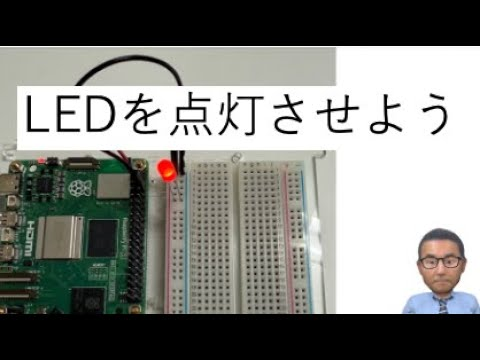

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('UIlU1xKJ70o', width=700, height=500)

## LEDについて
LEDはLight Emitting Diodeの略で、日本語では「発光ダイオード」という意味です。\
LEDは「電球」とは全く異なります。
- 電球：抵抗に電流を流すことで、電気エネルギーを熱エネルギーに変えることで光る
- LED：電子(マイナスの電気)とホール(プラスの電気)が半導体の結合部で再結合し、再結合エネルギーが光になる

※LEDの原理をもう少し知りたい場合は例えば[こちらの動画](https://www.youtube.com/watch?v=fxZpRqbxHwA)(Panasonic様)でわかりやすく説明されています。



LEDは以下のような特徴があります。
- 応答時間が速い(0.0000001秒以下)
- 電流は一方向にのみ流れる

## ブレッドボードとジャンパーケーブルについて

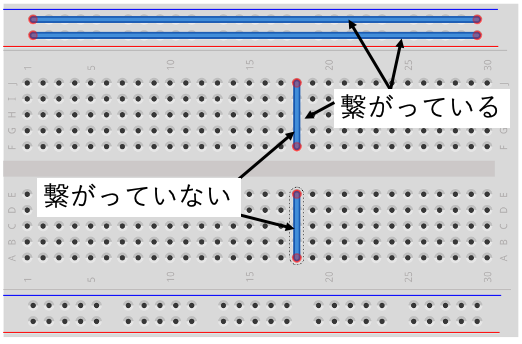

## LEDの点灯
以下のような回路を作って，LEDを点灯させよう。
- 3.3V → LEDの＋ (足が長い方)
- GND → LEDの-（足が短い方）

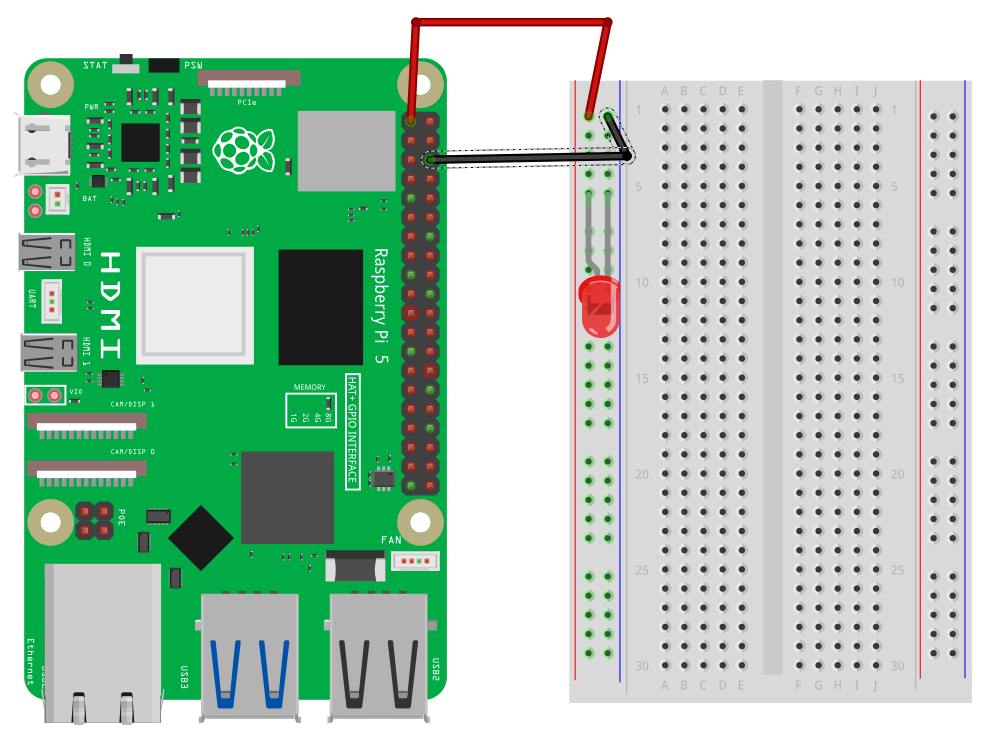

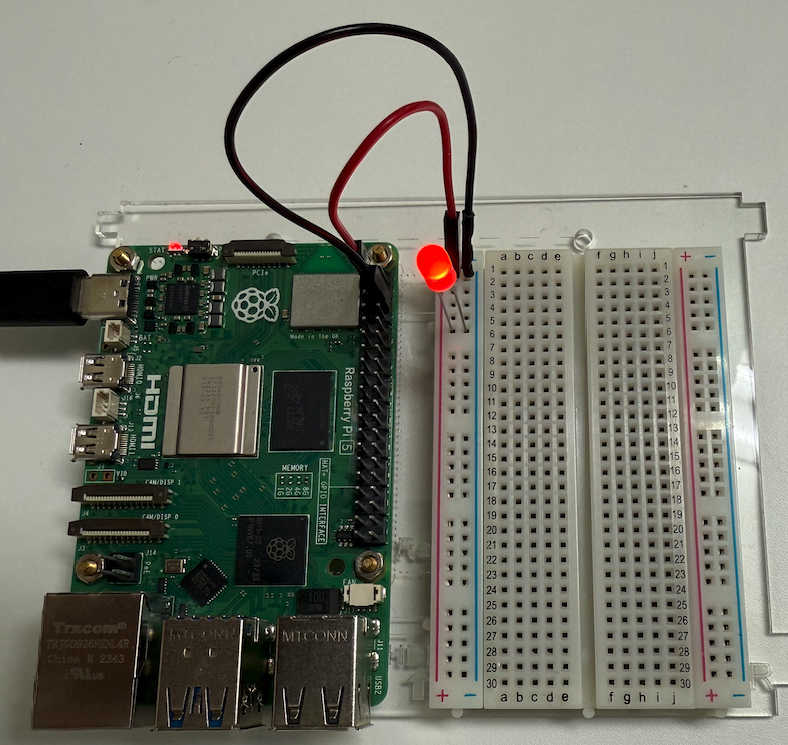

# GPIO出力基礎


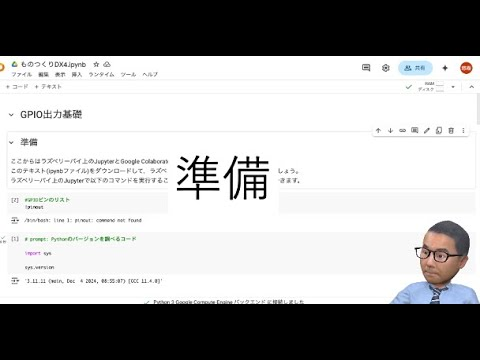

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('iK4T50nCQ2A', width=700, height=500)

In [ ]:
#GPIOピンのリスト
!pinout

Description        : Raspberry Pi 5B rev 1.0
Revision           : d04170
SoC                : BCM2712
RAM                : 8GB
Storage            : MicroSD
USB ports          : 4 (of which 2 USB3)
Ethernet ports     : 1 (1000Mbps max. speed)
Wi-fi              : True
Bluetooth          : True
Camera ports (CSI) : 2
Display ports (DSI): 2

,--------------------------------.
| oooooooooooooooooooo J8   : +====
| 1ooooooooooooooooooo      : |USB2
|  Wi  Pi Model 5B  V1.0  fan +====
|  Fi     +---+      +---+       |
|         |RAM|      |RP1|    +====
||p       +---+      +---+    |USB3
||c      -------              +====
||i        SoC      |c|c J14     |
(        -------  J7|s|s 12 +======
|  J2 bat   uart   1|i|i oo |   Net
| pwr\..|hd|...|hd|o|1|0    +======
`-| |-1o|m0|---|m1|--------------'

J8:
   3V3  (1) (2)  5V    
 GPIO2  (3) (4)  5V    
 GPIO3  (5) (6)  GND   
 GPIO4  (7) (8)  GPIO14
   GND  (9) (10) GPIO15
GPIO17 (11) (12) GPIO18
GPIO27 (13) (14) GND   
GPIO22 (15) (16) GPIO2

In [ ]:
# prompt: Pythonのバージョンを調べるコード

import sys

sys.version

'3.11.2 (main, Sep 14 2024, 03:00:30) [GCC 12.2.0]'

## Lチカ




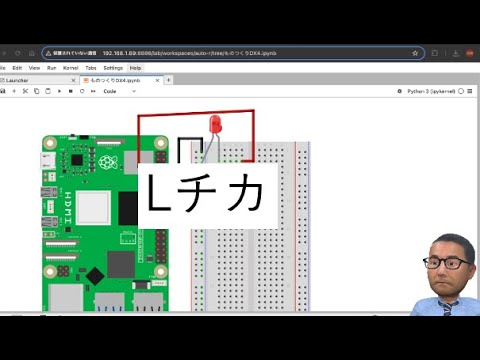

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('aCPHbjS1BS4', width=700, height=500)

LEDを1秒おきに点滅するコードを書きましょう。\
GPIO制御にはRPi.GPIOというライブラリを使います。\
GPIOピンとして`GPIO3`を使いましょう。
- LEDの+(足が長い方) → GPIO3
- LEDの-(足が短い方) → GND

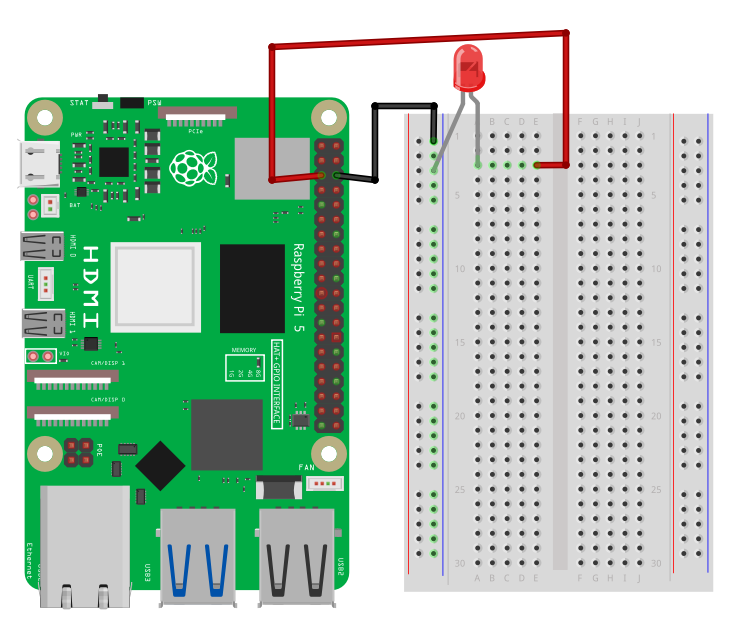

In [ ]:
# prompt: ラズベリーパイを使う。
# Pythonのバージョンは3.11。
# RPi.GPIOを使う。
# GPIO3を使う。
# LEDを１秒おきに点滅させるコードを書きなさい。

import RPi.GPIO as GPIO
import time

# GPIOピン番号の設定
GPIO_PIN = 3

# GPIOピン番号のモード設定
GPIO.setmode(GPIO.BCM)

# GPIOピンの出力設定
GPIO.setup(GPIO_PIN, GPIO.OUT)

try:
    while True:
        # LEDを点灯
        GPIO.output(GPIO_PIN, GPIO.HIGH)
        time.sleep(1)  # 1秒待つ

        # LEDを消灯
        GPIO.output(GPIO_PIN, GPIO.LOW)
        time.sleep(1)  # 1秒待つ

except KeyboardInterrupt:
    # Ctrl+Cで終了した場合の処理
    pass

finally:
    # GPIOのクリーンアップ
    GPIO.cleanup()


## プログラムの停止方法
## カーネルの再起動
- **Escを押したのちに，0を2回押す**

## 練習問題1
`GPIO12`を使って，0.5秒ON，1秒OFFを繰り返すコードを以下に書きなさい。

## 練習問題2
`GPIO3`に赤のLED，`GPIO12`に緑のLEDを繋ぎ，1秒おきに交互に点灯するコードを以下に書きなさい。